In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path= r"C:\Users\ACER\Desktop\module end project dataset\myexcel - myexcel.csv"
df= pd.read_csv(file_path)
print(df.columns)



Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')


In [7]:
# Performing pre-processing of the dataset
# Checking for missing values
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [8]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [ ]:
# Checking the data types of the columns
df.info()

In [12]:
# Converting the height column to numeric type and replacing the incorrect values with random numbers between 150 and 180
import numpy as np
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Height'] = df['Height'].fillna(np.random.randint(150, 180))

In [13]:
#  How many are there in each Team and the percentage splitting with respect to the total employees
team_count = df['Team'].value_counts()
team_percent = df['Team'].value_counts(normalize=True) * 100
print(team_count)
print(team_percent)

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64
Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz               

In [14]:
# Segregate the employees w.r.t different positions
position_count = df['Position'].value_counts()
print(position_count)

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


In [15]:
#  Find from which age group most of the employees belong to
age_group = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])
age_group_count = age_group.value_counts()
print(age_group_count)

Age
20-30    346
30-40     91
40-50      0
50-60      0
Name: count, dtype: int64


In [16]:
#  Find out under which team and position, spending in terms of salary is high
team_position_salary = df.groupby(['Team', 'Position'])['Salary'].sum()
print(team_position_salary)

Team                Position
Atlanta Hawks       C           22756250.0
                    PF          23952268.0
                    PG           9763400.0
                    SF           6000000.0
                    SG          10431032.0
                                   ...    
Washington Wizards  C           24490429.0
                    PF          11300000.0
                    PG          18022415.0
                    SF          11158800.0
                    SG          11356992.0
Name: Salary, Length: 149, dtype: float64


             Age    Salary
Age     1.000000  0.214009
Salary  0.214009  1.000000


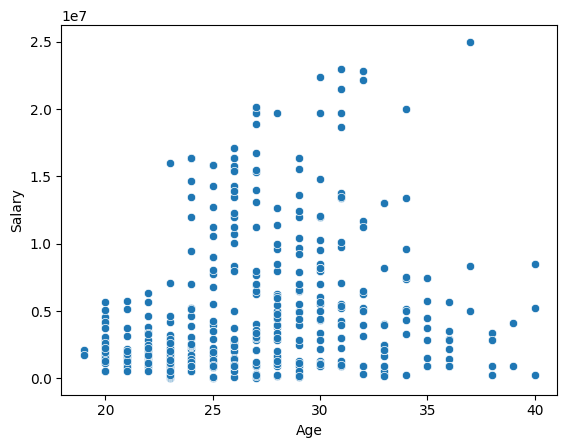

In [17]:
# Find if there is any correlation between age and salary , represent it visually
age_salary_corr = df[['Age', 'Salary']].corr()
print(age_salary_corr)
sns.scatterplot(x='Age', y='Salary', data=df)
plt.show()